In [1]:
from IPython.core.display import display, HTML
from matplotlib.pyplot import rc
display(HTML("<style>.container { width:100% !important; }</style>"))
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '16'}
rc('font', **font)  # pass in the font dict as kwargs
from osa import Client
import numpy as np
import matplotlib.pyplot as plt
import psutil
from tvtk.api import tvtk

%gui qt
from mayavi import mlab
import xemc3
import os
import xarray as xr
cwd = os.getcwd()
cwd

'/home/IPP-HGW/joag/Project_Autumn/project_autumn'

In [2]:
os.chdir('/home/IPP-HGW/joag/Project_Autumn/')
import w7x_interpolation_emc3.grid as grid

In [3]:
tracer = Client('http://esb.ipp-hgw.mpg.de:8280/services/FieldLineProxy?wsdl')

''' set the start points (R, phi, Z) for the tracing... '''
p = tracer.types.Points3D()
p.x1 = np.linspace(5.64, 6.3, 30)
p.x2 = np.zeros(30)
p.x3 = np.zeros(30)

''' set a coil configuration ... '''
config = tracer.types.MagneticConfig()

''' e.g. using a config ID from CoilsDB: 
    1 : 'w7x standard case', 3 : 'low iota', 4 : 'high iota', 5 : 'low mirror', etc. '''
config.configIds = [1] 

''' you could also create your own coil configurations 
    e.g. use only all type 3 of the non-planar sc coils from w7x: '''
#config.coilsIds = [162, 167, 172, 177, 182, 187, 192, 197, 202, 207]
#config.coilsIdsCurrents = [9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92]

''' you can use a grid for speeding up your requests. 
    Without a grid all tracing steps will be calculated by using Biot-Savart 
'''
my_grid = tracer.types.CylindricalGrid()
my_grid.RMin = 4.05
my_grid.RMax = 6.75
my_grid.ZMin = -1.35
my_grid.ZMax = 1.35
my_grid.numR = 181
my_grid.numZ = 181
my_grid.numPhi = 481

g = tracer.types.Grid()
g.cylindrical = my_grid
g.fieldSymmetry = 5

config.grid = g


pctask = tracer.types.PoincareInPhiPlane()
pctask.numPoints = 300
pctask.phi0 = [0.0]
                     
task = tracer.types.Task()
task.step = 0.01
task.poincare = pctask

''' you can use a Machine object for a limitation of the tracing region. 
    This sample uses a torus model (id = 164) from ComponentsDB: '''
machine = tracer.types.Machine()
machine.meshedModelsIds = [164] 
machine_grid = tracer.types.CartesianGrid()
machine_grid.XMin = -7
machine_grid.XMax = 7
machine_grid.YMin = -7
machine_grid.YMax = 7
machine_grid.ZMin = -1.5
machine_grid.ZMax = 1.5
machine_grid.numX = 400
machine_grid.numY = 400
machine_grid.numZ = 100

machine.grid = machine_grid
# machine = None

''' make a request to the web service: '''
result = tracer.service.trace(p, config, task, machine, None)

Text(0, 0.5, '$z[\\mathrm{m}]$')

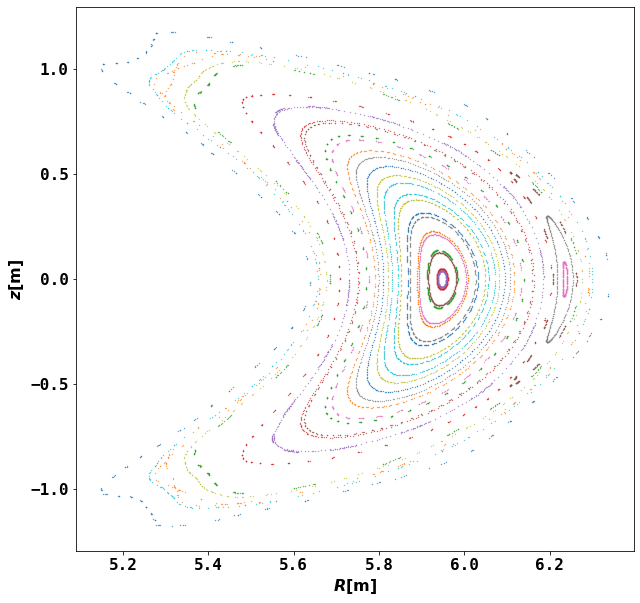

In [4]:
''' plot the results: '''
plt.figure(figsize=(10,10))
for i in range(0,len(result.surfs)):
    plt.scatter(result.surfs[i].points.x1, result.surfs[i].points.x3, s=0.1)
plt.xlabel("$R[\\mathrm{m}]$")
plt.ylabel("$z[\mathrm{m}]$")

In [5]:
os.chdir('/home/IPP-HGW/joag/Project_Autumn/')
ds = xr.open_dataset('/home/IPP-HGW/joag/Project_Autumn/' + '/Datasets_paramscan/P5MW_N1_5E13D_25_SP4.nc')

In [6]:
ds

<xarray.Dataset>
Dimensions:                       (delta_phi: 2, delta_r: 2, delta_theta: 2, phi: 36, r: 130, theta: 398)
Coordinates:
    R_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds                    (phi, delta_phi) float64 ...
    iteration                     int64 ...
Dimensions without coordinates: delta_phi, delta_r, delta_theta, phi, r, theta
Data variables:
    _plasma_map                   (r, theta, phi) int64 ...
    ne                            (r, theta, phi) float64 ...
    nZ1                           (r, theta, phi) float64 ...
    nZ2                           (r, theta, phi) float64 ...
    nZ3                           (r, theta, phi) float64 ...
    nZ4                           (r, theta, phi) float64 ...
    nZ5                           (r, theta, phi) float64 ...
    nZ6                           (r, theta, phi) float64 ...
    M                             (r, theta, phi) float64 ...
    Te                            (r, theta, phi) float64 ...
    Ti                            (r, theta, phi) float64 ...
    nH                            (r, theta, phi) float64 ...
    nH2                           (r, theta, phi) float64 ...
    nH2+                          (r, theta, phi) float64 ...
    TH                            (r, theta, phi) float64 ...
    bf_bounds                     (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    PLATES_MAG                    (r, theta, phi) bool ...
    TEMPERATURE_I_0               (r, theta, phi) float64 ...
    DENSITY_E_A_0                 (r, theta, phi) float64 ...
    DENSITY_E_I_0                 (r, theta, phi) float64 ...
    DENSITY_E_M_0                 (r, theta, phi) float64 ...
    fort.40_0                     (r, theta, phi) float64 ...
    fort.42_0                     (r, theta, phi) float64 ...
    fort.43_0                     (r, theta, phi) float64 ...
    fort.46_0                     (r, theta, phi) float64 ...
    fort.47_0                     (r, theta, phi) float64 ...
    fort.47_1                     (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_0  (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_1  (r, theta, phi) float64 ...
    IMPURITY_NEUTRAL_0            (r, theta, phi) float64 ...
    IMP_RADIATION_0               (r, theta, phi) float64 ...
    FLUX_CONSERVATION_0           (r, theta, phi) float64 ...
    LG_CELL_0                     (r, theta, phi) float64 ...
    dens_change                   float64 ...
    flow_change                   float64 ...
    part_balance                  float64 ...
    dens_upstream                 float64 ...
    dens_down_back                float64 ...
    dens_down_mean                float64 ...
    dens_down_fwd                 float64 ...
    Te_change                     float64 ...
    Te_upstream                   float64 ...
    Te_down_back                  float64 ...
    Te_down_mean                  float64 ...
    Te_down_fwd                   float64 ...
    Ti_change                     float64 ...
    Ti_upstream                   float64 ...
    Ti_down_back                  float64 ...
    Ti_down_mean                  float64 ...
    Ti_down_fwd                   float64 ...
    P_loss_gas                    float64 ...
    P_loss_imp                    float64 ...
    P_loss_target                 float64 ...
    ionization_core               float64 ...
    ionization_edge               float64 ...
    ionization_electron           float64 ...
    ionization_ion                float64 ...
    ionization_moment_fwd         float64 ...
    ionization_moment_bwk         float64 ...
    TOTAL_FLX                     float64 ...
    TOTAL_RAD                     float64 ...

In [7]:
grid_obj = grid.grid(ds = ds, ngrid_cart = 128, inc_r = [50, 130], inc_t = [0,398], inc_p = [0,36])
grid_cyl = np.ones(grid_obj.R.shape)*np.nan
grid_cyl.shape
dimgrid = list([x for x in grid_cyl.shape[::-1]])
dimgrid

[36, 398, 80]

In [8]:
def get_magneticfield(grid_obj, tracer = tracer):
    """
    Args:
     - grid_obj, grid object
    Out:
     - Bmesh, ndarray np.float64, meshgrid of the magnetic field components
    """
    config = tracer.types.MagneticConfig()
    # config 0 is standard config
    config.configIds = [0]
    
    #set coords for start tracing in cartesian
    pos = tracer.types.Points3D()
    pos.x1 = grid_obj.cyl_flat[:,0]
    pos.x2 = grid_obj.cyl_flat[:,1]
    pos.x3 = grid_obj.cyl_flat[:,2]
    #start tracer with startpos and config
    res = tracer.service.magneticField(pos, config)
    B = np.zeros((3,) + pos.x1.shape)
    B[0] = np.asarray(res.field.x1)
    B[1] = np.asarray(res.field.x2)
    B[2] = np.asarray(res.field.x3)
    Bmesh = B.reshape((3,) + (grid_obj.R.shape))
    return Bmesh

# Example vector dataset mayavi and tvtk

In [9]:
bfield = get_magneticfield(grid_obj = grid_obj)

In [10]:
bfield

array([[[[-2.03809863e-02, -4.98407440e-02, -7.86679280e-02, ...,
          -6.10735050e-01, -6.04420168e-01, -5.98330584e-01],
         [-3.13344358e-02, -6.05725501e-02, -8.90679876e-02, ...,
          -6.20531901e-01, -6.13438252e-01, -6.06519832e-01],
         [-4.21908564e-02, -7.11505595e-02, -9.92725770e-02, ...,
          -6.30606331e-01, -6.22724485e-01, -6.14963868e-01],
         ...,
         [ 1.26371186e-02, -1.71102825e-02, -4.66233382e-02, ...,
          -5.83192353e-01, -5.79135261e-01, -5.75428450e-01],
         [ 1.64744920e-03, -2.80696456e-02, -5.74109084e-02, ...,
          -5.92091839e-01, -5.87294488e-01, -5.82809580e-01],
         [-9.37319766e-03, -3.89936879e-02, -6.81046826e-02, ...,
          -6.01257619e-01, -5.95708314e-01, -5.90430010e-01]],

        [[-2.04124224e-02, -4.98495601e-02, -7.86458691e-02, ...,
          -6.07748617e-01, -6.01601839e-01, -5.95725230e-01],
         [-3.14452983e-02, -6.06563647e-02, -8.91146351e-02, ...,
          -6.17543145e

In [11]:
sgrid = tvtk.StructuredGrid(dimensions=list(grid_obj.R.shape))
grid_cyl_flat = np.ones((grid_cyl.shape[0]*grid_cyl.shape[1]*grid_cyl.shape[2], 3))*np.nan
grid_cyl_flat[:,0] = grid_obj.R.flatten()
grid_cyl_flat[:,1] = grid_obj.tor_z.flatten()
grid_cyl_flat[:,2] = (grid_obj.phi*np.ones(grid_cyl.shape)).flatten()

sgrid.points = grid_cyl_flat
psutil.virtual_memory()

svmem(total=33731371008, available=28838305792, percent=14.5, used=4127617024, free=25220546560, active=5032361984, inactive=2234060800, buffers=1064960, cached=4382142464, shared=96923648, slab=465731584)

In [12]:
"""%matplotlib
plt.figure(figsize=(20,20))
quiv = plt.quiver(grid_obj.R[:,:,0], grid_obj.tor_z[:,:,0], bfield[0, :, :, 0], bfield[1, :, :, 0], np.sqrt(np.sum(bfield[:2, :, :, 0]**2, axis=0)))#, scale = np.sqrt(np.sum(bfield[:2, :, :, 0]**2, axis=0)))
cbar = plt.colorbar(quiv)"""

'%matplotlib\nplt.figure(figsize=(20,20))\nquiv = plt.quiver(grid_obj.R[:,:,0], grid_obj.tor_z[:,:,0], bfield[0, :, :, 0], bfield[1, :, :, 0], np.sqrt(np.sum(bfield[:2, :, :, 0]**2, axis=0)))#, scale = np.sqrt(np.sum(bfield[:2, :, :, 0]**2, axis=0)))\ncbar = plt.colorbar(quiv)'

In [13]:
dims = 1
for x in bfield.shape[1:]:
    dims *= x

sgrid.point_data.vectors = bfield.reshape(dims, 3)
sgrid.point_data.vectors.name = 'B'
print(sgrid.point_data.vectors)

vtkDoubleArray (0x4f6c6a0)
  Debug: Off
  Modified Time: 1249812
  Reference Count: 2
  Registered Events: 
    Registered Observers:
      vtkObserver (0x4e96800)
        Event: 33
        EventName: ModifiedEvent
        Command: 0x51229d0
        Priority: 0
        Tag: 3
      vtkObserver (0x4f867a0)
        Event: 2
        EventName: DeleteEvent
        Command: 0x4b35720
        Priority: 0
        Tag: 1
  Name: B
  Data type: double
  Size: 3438720
  MaxId: 3438719
  NumberOfComponents: 3
  Information: 0x4f18d30
    Debug: Off
    Modified Time: 1249811
    Reference Count: 1
    Registered Events: (none)
  Name: B
  Number Of Components: 3
  Number Of Tuples: 1146240
  Size: 3438720
  MaxId: 3438719
  LookupTable: (none)




In [14]:
"""
Plotting the actual values in the W7X grid with the electron temperature as a test.
"""
## clear the field
#mlab.clf()
##add the dataset to the pipeline, the principle is to add several object on top of each other
#src = mlab.pipeline.add_dataset(sgrid)
##src = mlab.pipeline.vector_field(bfield[0], bfield[1], bfield[2])
#vecs = mlab.pipeline.vectors(src, mask_points=20, scale_factor=3.)
## add the outline of the 3d domain
#mlab.outline()
## add axis to the plot
#mlab.axes()

'\nPlotting the actual values in the W7X grid with the electron temperature as a test.\n'

In [15]:
ds

<xarray.Dataset>
Dimensions:                       (delta_phi: 2, delta_r: 2, delta_theta: 2, phi: 36, r: 130, theta: 398)
Coordinates:
    R_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds                    (phi, delta_phi) float64 0.0 ... 0.6283
    iteration                     int64 -9
Dimensions without coordinates: delta_phi, delta_r, delta_theta, phi, r, theta
Data variables:
    _plasma_map                   (r, theta, phi) int64 ...
    ne                            (r, theta, phi) float64 ...
    nZ1                           (r, theta, phi) float64 ...
    nZ2                           (r, theta, phi) float64 ...
    nZ3                           (r, theta, phi) float64 ...
    nZ4                           (r, theta, phi) float64 ...
    nZ5                           (r, theta, phi) float64 ...
    nZ6                           (r, theta, phi) float64 ...
    M                             (r, theta, phi) float64 ...
    Te                            (r, theta, phi) float64 ...
    Ti                            (r, theta, phi) float64 ...
    nH                            (r, theta, phi) float64 ...
    nH2                           (r, theta, phi) float64 ...
    nH2+                          (r, theta, phi) float64 ...
    TH                            (r, theta, phi) float64 ...
    bf_bounds                     (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    PLATES_MAG                    (r, theta, phi) bool ...
    TEMPERATURE_I_0               (r, theta, phi) float64 ...
    DENSITY_E_A_0                 (r, theta, phi) float64 ...
    DENSITY_E_I_0                 (r, theta, phi) float64 ...
    DENSITY_E_M_0                 (r, theta, phi) float64 ...
    fort.40_0                     (r, theta, phi) float64 ...
    fort.42_0                     (r, theta, phi) float64 ...
    fort.43_0                     (r, theta, phi) float64 ...
    fort.46_0                     (r, theta, phi) float64 ...
    fort.47_0                     (r, theta, phi) float64 ...
    fort.47_1                     (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_0  (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_1  (r, theta, phi) float64 ...
    IMPURITY_NEUTRAL_0            (r, theta, phi) float64 ...
    IMP_RADIATION_0               (r, theta, phi) float64 ...
    FLUX_CONSERVATION_0           (r, theta, phi) float64 ...
    LG_CELL_0                     (r, theta, phi) float64 ...
    dens_change                   float64 0.0148
    flow_change                   float64 0.01
    part_balance                  float64 978.5
    dens_upstream                 float64 1.5e+19
    dens_down_back                float64 9.014e+18
    dens_down_mean                float64 8.017e+18
    dens_down_fwd                 float64 2.518e+18
    Te_change                     float64 0.036
    Te_upstream                   float64 530.9
    Te_down_back                  float64 52.1
    Te_down_mean                  float64 48.42
    Te_down_fwd                   float64 28.14
    Ti_change                     float64 0.043
    Ti_upstream                   float64 591.8
    Ti_down_back                  float64 62.88
    Ti_down_mean                  float64 62.02
    Ti_down_fwd                   float64 57.26
    P_loss_gas                    float64 4.246e+04
    P_loss_imp                    float64 3.492e+04
    P_loss_target                 float64 3.726e+05
    ionization_core               float64 0.03324
    ionization_edge               float64 0.9668
    ionization_electron           float64 -25.88
    ionization_ion                float64 -18.69
    ionization_moment_fwd         float64 -1.092e-18
    ionization_moment_bwk         float64 2.586e-18
    TOTAL_FLX                     float64 39.14
    TOTAL_RAD                     float64 3.491e+04

In [16]:
import xarray as xr
ds_ex = xr.open_dataset('~/Project_Autumn/w7x_interpolation_emc3/xemc3-data/emc3_example.nc')

In [17]:
ds_ex

<xarray.Dataset>
Dimensions:                       (delta_phi: 2, delta_r: 2, delta_theta: 2, iteration: 1000, phi: 36, r: 139, theta: 512)
Coordinates:
    R_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds                    (phi, delta_phi) float64 ...
  * iteration                     (iteration) int64 -999 -998 -997 ... -2 -1 0
Dimensions without coordinates: delta_phi, delta_r, delta_theta, phi, r, theta
Data variables:
    _plasma_map                   (r, theta, phi) int64 ...
    ne                            (r, theta, phi) float64 ...
    nZ1                           (r, theta, phi) float64 ...
    nZ2                           (r, theta, phi) float64 ...
    nZ3                           (r, theta, phi) float64 ...
    nZ4                           (r, theta, phi) float64 ...
    nZ5                           (r, theta, phi) float64 ...
    nZ6                           (r, theta, phi) float64 ...
    M                             (r, theta, phi) float64 ...
    Te                            (r, theta, phi) float64 ...
    Ti                            (r, theta, phi) float64 ...
    Lc                            (r, theta, phi) float64 ...
    nH                            (r, theta, phi) float64 ...
    nH2                           (r, theta, phi) float64 ...
    nH2+                          (r, theta, phi) float64 ...
    TH                            (r, theta, phi) float64 ...
    bf_bounds                     (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    PLATES_MAG                    (r, theta, phi) bool ...
    TEMPERATURE_I_0               (r, theta, phi) float64 ...
    DENSITY_E_A_0                 (r, theta, phi) float64 ...
    DENSITY_E_I_0                 (r, theta, phi) float64 ...
    DENSITY_E_M_0                 (r, theta, phi) float64 ...
    fort.40_0                     (r, theta, phi) float64 ...
    fort.42_0                     (r, theta, phi) float64 ...
    fort.43_0                     (r, theta, phi) float64 ...
    fort.46_0                     (r, theta, phi) float64 ...
    fort.47_0                     (r, theta, phi) float64 ...
    fort.47_1                     (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_0  (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_1  (r, theta, phi) float64 ...
    IMPURITY_NEUTRAL_0            (r, theta, phi) float64 ...
    IMP_RADIATION_0               (r, theta, phi) float64 ...
    FLUX_CONSERVATION_0           (r, theta, phi) float64 ...
    LG_CELL_0                     (r, theta, phi) float64 ...
    dens_change                   (iteration) float64 ...
    flow_change                   (iteration) float64 ...
    part_balance                  (iteration) float64 ...
    dens_upstream                 (iteration) float64 ...
    dens_down_back                (iteration) float64 ...
    dens_down_mean                (iteration) float64 ...
    dens_down_fwd                 (iteration) float64 ...
    Te_change                     (iteration) float64 ...
    Te_upstream                   (iteration) float64 ...
    Te_down_back                  (iteration) float64 ...
    Te_down_mean                  (iteration) float64 ...
    Te_down_fwd                   (iteration) float64 ...
    Ti_change                     (iteration) float64 ...
    Ti_upstream                   (iteration) float64 ...
    Ti_down_back                  (iteration) float64 ...
    Ti_down_mean                  (iteration) float64 ...
    Ti_down_fwd                   (iteration) float64 ...
    P_loss_gas                    (iteration) float64 ...
    P_loss_imp                    (iteration) float64 ...
    P_loss_target                 (iteration) float64 ...
    ionization_core               (iteration) float64 ...
    ionization_edge               (iteration) float64 ...
    ioni

# Field line tracing projection(?)
I want to have profiles of any scalar field along field lines which I can relate in 3D space afterwards.
Questions
- How do I choose field line? By the starting position? And which coordinate system are they given in?
- 

In [18]:
ds

<xarray.Dataset>
Dimensions:                       (delta_phi: 2, delta_r: 2, delta_theta: 2, phi: 36, r: 130, theta: 398)
Coordinates:
    R_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds                    (phi, delta_phi) float64 0.0 ... 0.6283
    iteration                     int64 -9
Dimensions without coordinates: delta_phi, delta_r, delta_theta, phi, r, theta
Data variables:
    _plasma_map                   (r, theta, phi) int64 ...
    ne                            (r, theta, phi) float64 ...
    nZ1                           (r, theta, phi) float64 ...
    nZ2                           (r, theta, phi) float64 ...
    nZ3                           (r, theta, phi) float64 ...
    nZ4                           (r, theta, phi) float64 ...
    nZ5                           (r, theta, phi) float64 ...
    nZ6                           (r, theta, phi) float64 ...
    M                             (r, theta, phi) float64 ...
    Te                            (r, theta, phi) float64 ...
    Ti                            (r, theta, phi) float64 ...
    nH                            (r, theta, phi) float64 ...
    nH2                           (r, theta, phi) float64 ...
    nH2+                          (r, theta, phi) float64 ...
    TH                            (r, theta, phi) float64 ...
    bf_bounds                     (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    PLATES_MAG                    (r, theta, phi) bool ...
    TEMPERATURE_I_0               (r, theta, phi) float64 ...
    DENSITY_E_A_0                 (r, theta, phi) float64 ...
    DENSITY_E_I_0                 (r, theta, phi) float64 ...
    DENSITY_E_M_0                 (r, theta, phi) float64 ...
    fort.40_0                     (r, theta, phi) float64 ...
    fort.42_0                     (r, theta, phi) float64 ...
    fort.43_0                     (r, theta, phi) float64 ...
    fort.46_0                     (r, theta, phi) float64 ...
    fort.47_0                     (r, theta, phi) float64 ...
    fort.47_1                     (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_0  (r, theta, phi) float64 ...
    IMPURITY_IONIZATION_SOURCE_1  (r, theta, phi) float64 ...
    IMPURITY_NEUTRAL_0            (r, theta, phi) float64 ...
    IMP_RADIATION_0               (r, theta, phi) float64 ...
    FLUX_CONSERVATION_0           (r, theta, phi) float64 ...
    LG_CELL_0                     (r, theta, phi) float64 ...
    dens_change                   float64 0.0148
    flow_change                   float64 0.01
    part_balance                  float64 978.5
    dens_upstream                 float64 1.5e+19
    dens_down_back                float64 9.014e+18
    dens_down_mean                float64 8.017e+18
    dens_down_fwd                 float64 2.518e+18
    Te_change                     float64 0.036
    Te_upstream                   float64 530.9
    Te_down_back                  float64 52.1
    Te_down_mean                  float64 48.42
    Te_down_fwd                   float64 28.14
    Ti_change                     float64 0.043
    Ti_upstream                   float64 591.8
    Ti_down_back                  float64 62.88
    Ti_down_mean                  float64 62.02
    Ti_down_fwd                   float64 57.26
    P_loss_gas                    float64 4.246e+04
    P_loss_imp                    float64 3.492e+04
    P_loss_target                 float64 3.726e+05
    ionization_core               float64 0.03324
    ionization_edge               float64 0.9668
    ionization_electron           float64 -25.88
    ionization_ion                float64 -18.69
    ionization_moment_fwd         float64 -1.092e-18
    ionization_moment_bwk         float64 2.586e-18
    TOTAL_FLX                     float64 39.14
    TOTAL_RAD                     float64 3.491e+04

In [19]:
def get_targetpos(ir, iz, ip, ds):
    i_targetcells = ds['PLATES_MAG'].values
    R = ds['R_bounds'].isel(delta_r = 0, delta_theta=0, delta_phi=0).values[i_targetcells][ir]
    z = ds['z_bounds'].isel(delta_r = 0, delta_theta=0, delta_phi=0).values[i_targetcells][iz]
    phi = ds['phi_bounds'].isel(delta_phi=0).values[ip]
    return R, z ,phi

idr = np.random.randint(0,ds['PLATES_MAG'].values.shape[0])
idz = np.random.randint(0,ds['PLATES_MAG'].values.shape[1])
idp = np.random.randint(0,ds['PLATES_MAG'].values.shape[2])

print("idx", (idr, idz, idp))
postest = get_targetpos(ir=idr, iz=idz, ip=idp, ds = ds_ex)
postest

idx (101, 287, 28)


(5.39151529, 0.9684662500000001, 0.4886921905584123)

In [23]:
ds['PLATES_MAG']

<xarray.DataArray 'PLATES_MAG' (r: 130, theta: 398, phi: 36)>
array([[[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[False, False, ...,  True,  True],
        [False, False, ...,  True,  True],
        ...,
        [False, False, ...,  True,  True],
        [False, False, ...,  True,  True]],

       [[False, False, ...,  True,  True],
        [False, False, ...,  True,  True],
        ...,
        [False, False, ...,  True,  True],
        [False, False, ...,  True,  True]]])
Coordinates:
    iteration  int64 -9
Dimensions without coordinates: r, theta, phi
Attributes:
    xemc3_type:  plates_mag
    long_name:   Cells that are within or behind plates

In [20]:
try:
    from dave_utils import jafw
except ImportError:
    print("Importing failed. Consider installing dave_utils with:")
    print("pip install --user git+https://gitlab.mpcdf.mpg.de/dave/dave_utils.git")
    jafw = None
    raise

# This will fail outside of the IPP network
flt = jafw.getSrv()

config = jafw.setCurrents([-1.74e6] * 5 + [0] * 5)

pos = flt.types.Points3D()
pos.x1, pos.x2, pos.x3 = postest

lineTask = flt.types.LineTracing()
lineTask.numSteps = 100000

task = flt.types.Task()
task.step = 0.001
task.lines = lineTask

res = flt.service.trace(pos, config, task, None, None)

i = 0
dat = np.array(
    [
        res.lines[i].vertices.x1,
        res.lines[i].vertices.x2,
        res.lines[i].vertices.x3,
    ]
)

dat.shape
mapped = ds_ex.emc3.evaluate_at_xyz(
    dat[0],
    dat[1],
    dat[2],
    "Te",
    periodicity=5,
    updownsym=True,
    delta_phi=np.pi / 180,
)

In [21]:
# load divertor plates
#comps = Client("http://esb.ipp-hgw.mpg.de:8280/services/ComponentsDbRest")

In [22]:
mlab.clf()
mlab.points3d(res.lines[0].vertices.x1, res.lines[0].vertices.x2, res.lines[0].vertices.x3)


In [29]:
len(res.lines[0].vertices.x1)

100001

Text(0, 0.5, '$z[\\mathrm{m}]$')

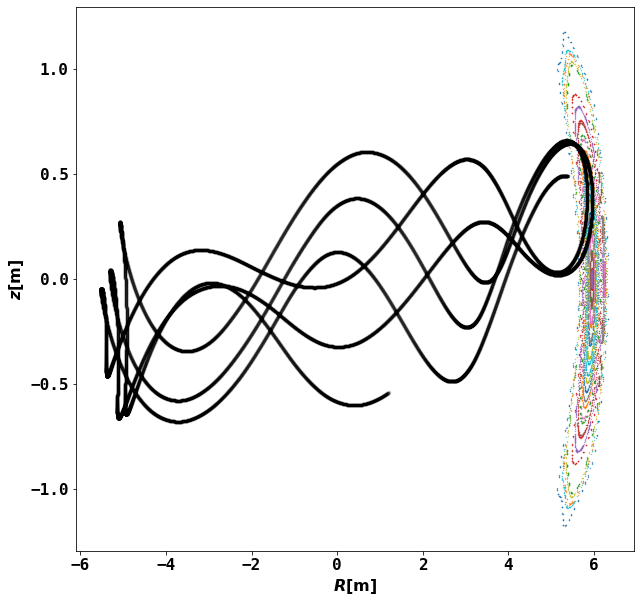

In [24]:
''' plot the results: '''
plt.figure(figsize=(10,10))
for i in range(0,len(result.surfs)):
    plt.scatter(result.surfs[i].points.x1, result.surfs[i].points.x3, s=0.1)
plt.plot(res.lines[0].vertices.x1, res.lines[0].vertices.x3, 'k.', alpha = 0.02)
plt.xlabel("$R[\\mathrm{m}]$")
plt.ylabel("$z[\mathrm{m}]$")
#plt.xlim(5,6.5)

In [31]:
np.nansum(mapped["Te"])

586817.3382671439

Text(0.5, 0, '$N_{steps}$')

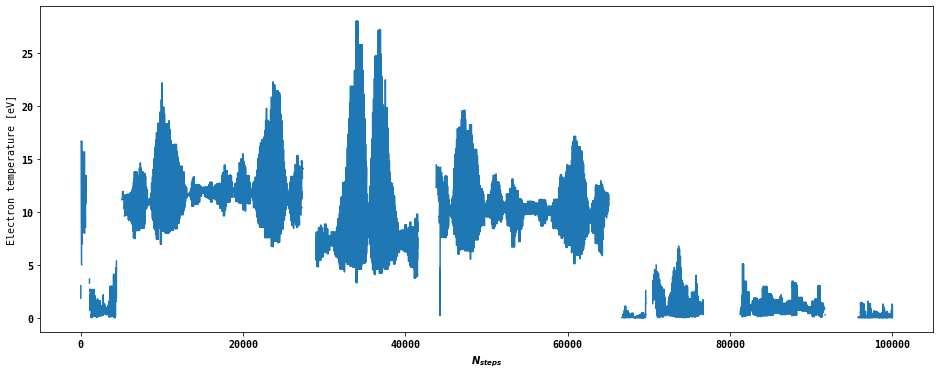

In [32]:
%matplotlib inline
if jafw is not None:
    mapped["Te"].plot(figsize=(16,6))
else:
    print("Fieldlinetracer not available ...")
#plt.xlim(0,100)
plt.xlabel("$N_{steps}$")